In [1]:
from pathlib import Path 
import torch
import numpy as np
import pandas as pd
import imgaug
from imgaug.augmentables.bbs import BoundingBox
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [2]:
class CardiacDataset(torch.utils.data.Dataset):
    def __init__(self, labels_csv, patient_ids, path_to_images, mean, std):
        self.labels_csv = pd.read_csv(labels_csv)
        self.patient_ids = np.load(patient_ids)
        self.path_to_images = Path(path_to_images)
        self.mean = mean
        self.std = std

    def __getitem__(self, idx):
        patient_id = self.patient_ids[idx]
        patient_data = self.labels_csv[self.labels_csv["name"] == patient_id]
        x_min = patient_data["x0"].item()
        y_min = patient_data["y0"].item()
        x_max = x_min + patient_data["w"].item()
        y_max = y_min + patient_data["h"].item()

        image_path = self.path_to_images/patient_id
        image = np.load(f"{image_path}.npy").astype(np.float32)
        image = (image-self.mean)/(self.std)
        image = torch.tensor(image).unsqueeze(0)

        return image, torch.tensor((x_min, y_min, x_max, y_max))
    
    def __len__(self):
        return len(self.patient_ids)

In [3]:
cdata = CardiacDataset("rsna_heart_detection.csv","train_subjects.npy",Path("Processed_Heart_Detection/train"), 0.49, 0.25)

In [4]:
img, bbox = cdata[0]

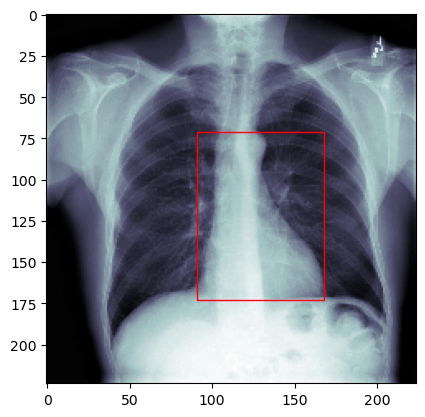

In [7]:
fig, axis = plt.subplots(1,1)
axis.imshow(img[0], cmap = "bone")
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3]-bbox[1], edgecolor = "r", facecolor = "none")
axis.add_patch(rect)